# **Set up**

In [ ]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# **Get The Data**

In [ ]:
data = pd.read_csv('diamonds.csv')

In [ ]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**carat** = weight of the diamond (0.2--5.01)

**cut** = quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color** = from D (best) to J (worst)

**clarity** = measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**depth** = total depth percentage = z / mean(x, y) = 2 * z / (x + y) ,(43--79)

**table** = width of top of diamond relative to widest point ,(43--95)

**price** = the Price of the Diamond, (326 --18823).

**x** = length (0--10.74 mm)

**y** = width (0--58.9 mm)

**z** = depth (0--31.8 mm)

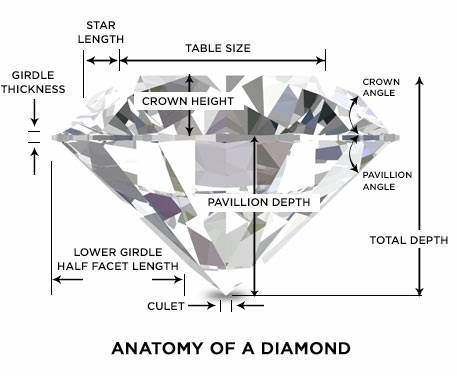

We can drop the 'Unnamed: 0' column as we already have Index, see the code below.

In [ ]:
data.drop(labels='Unnamed: 0', inplace=True, axis=1)

In [ ]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


The data contains: 


*   3 Categorical variables: 'cut', 'color', 'clarity'
*   7 Numerical variables: 'x', 'y', 'z', 'price', 'carat', 'depth', 'table'



# **Discover and visualize the data to gain insights**

<Figure size 720x576 with 0 Axes>

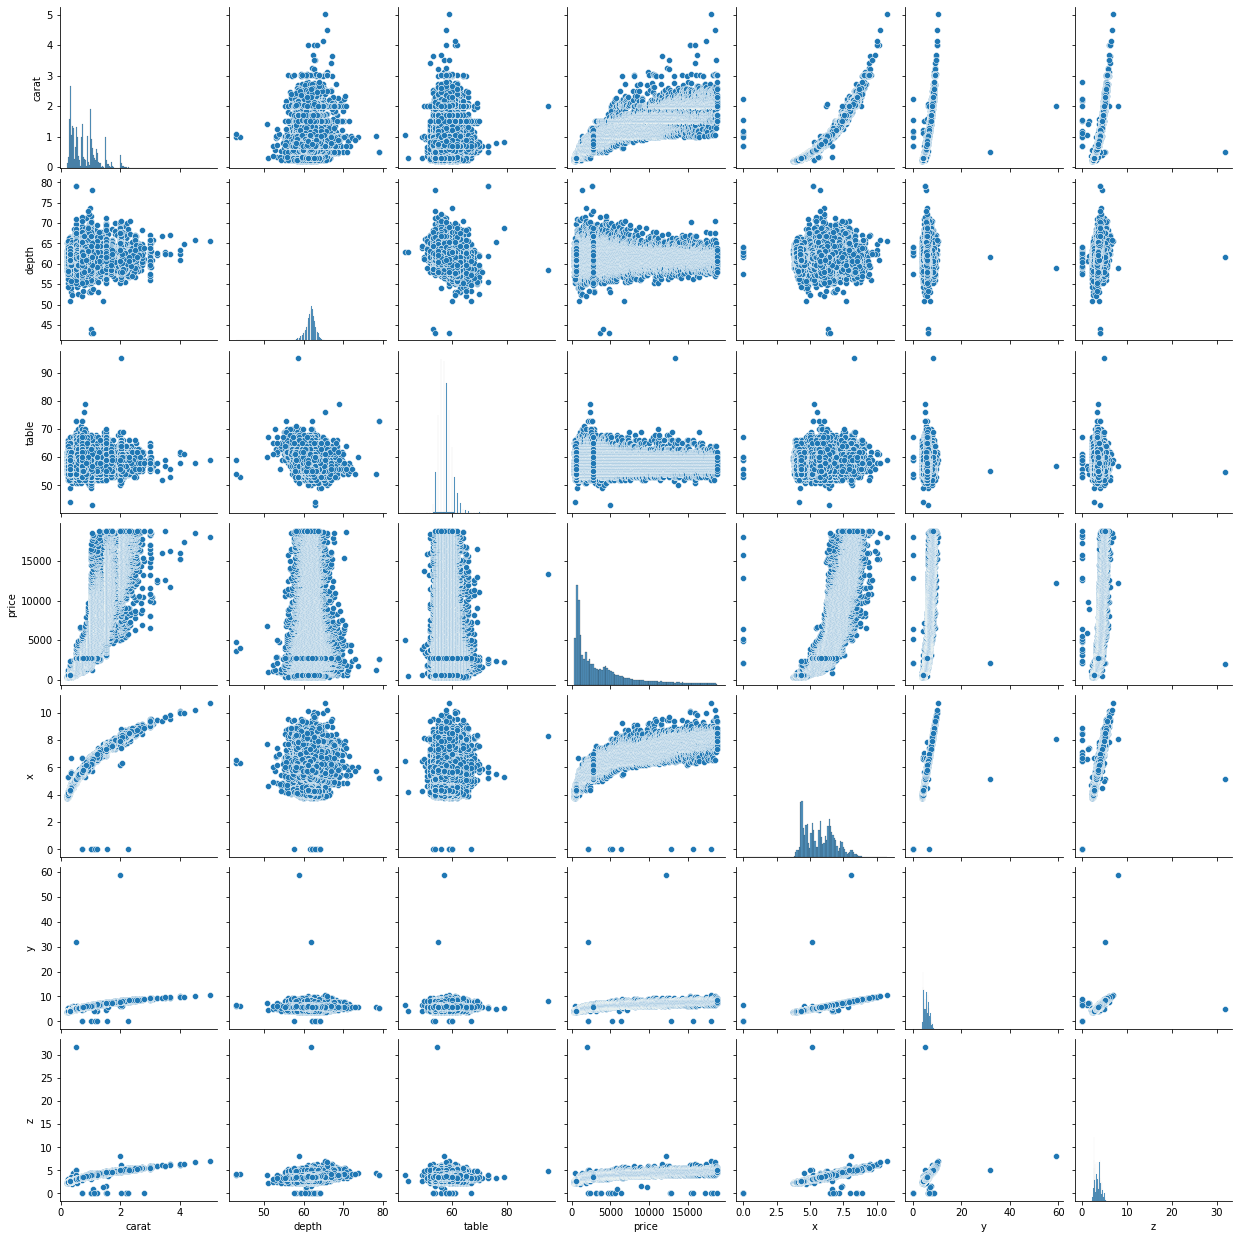

In [ ]:
plt.figure(figsize=(10,8))
sns.pairplot(data)

**Notice:**


*   the right skewed ditribution of "price", "carat"
*   points with zeroes clearly shown in figures of : 'z', 'x' and 'y'
*   The graph of 'z' shows an extreme value of 'z' >30 !!!
*   two points may be outliers obviously noticable in 'y' figure






price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64


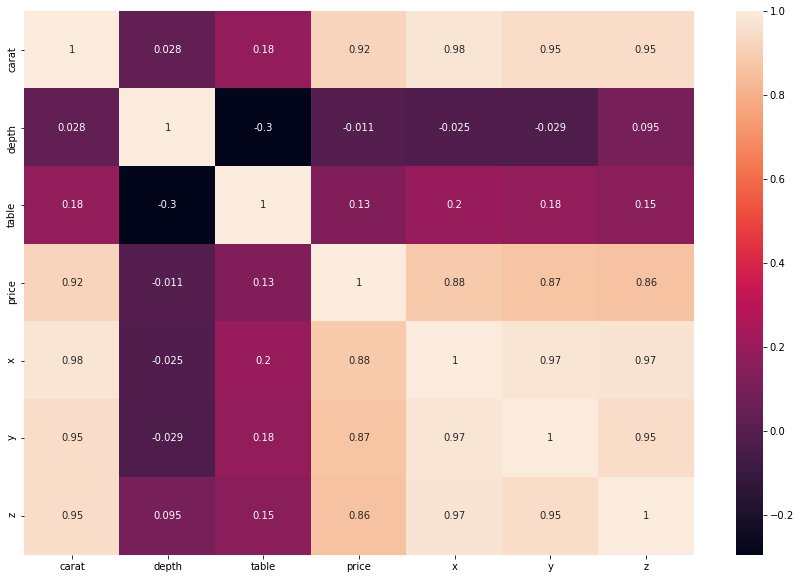

In [ ]:
corr_matrix = data.corr()
print(corr_matrix["price"].sort_values(ascending=False))

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,annot=True)



*   All the variables are positively correlated with the target varible 
*   Almost all the variable are significantly correlated(>0.8) except "table" and "depth" are slightly correlated with the target variable: 'price'

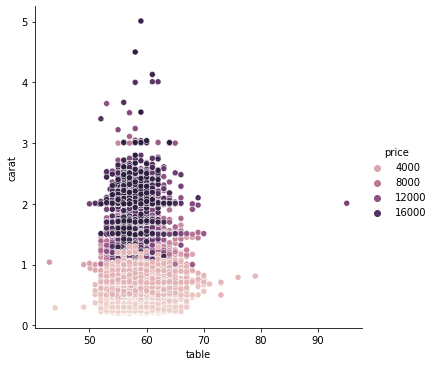

In [ ]:
sns.relplot(data=data, x = "table", y="carat", hue = "price" )

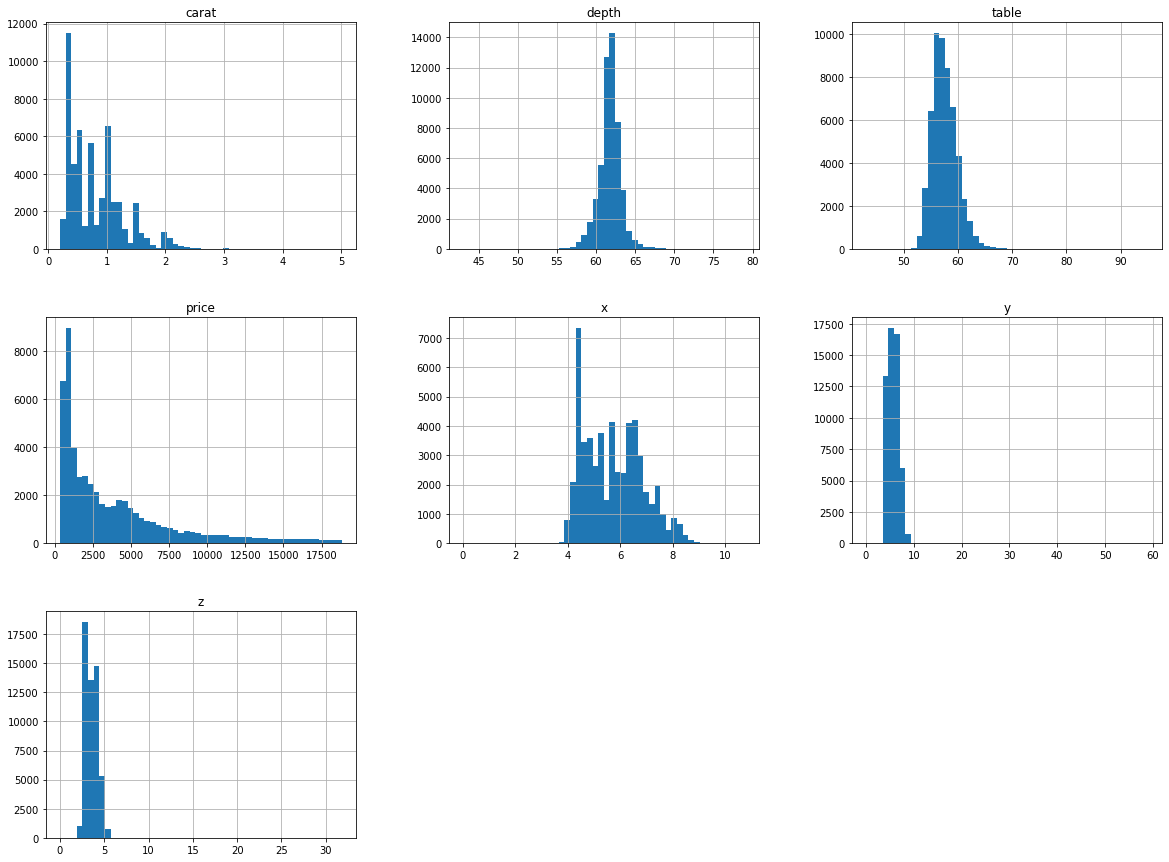

In [ ]:
data.hist(bins=50, figsize=(20,15))
plt.show()

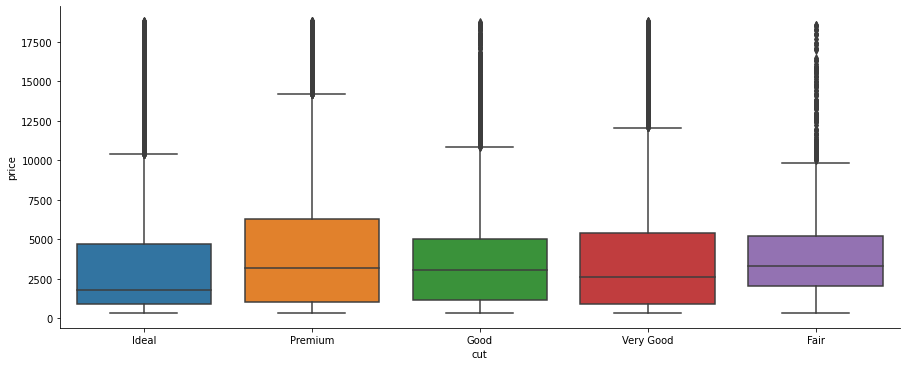

In [ ]:
sns.factorplot(x='cut', y='price',data=data, kind='box',aspect=2.5)

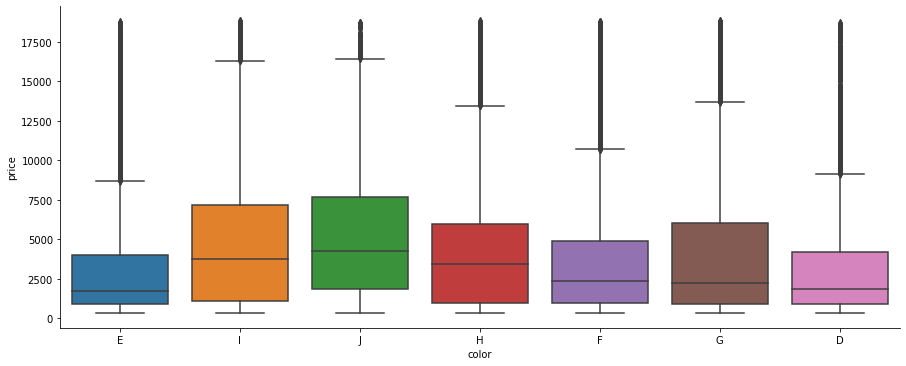

In [ ]:
sns.factorplot(x='color', y='price',data=data, kind='box',aspect=2.5)

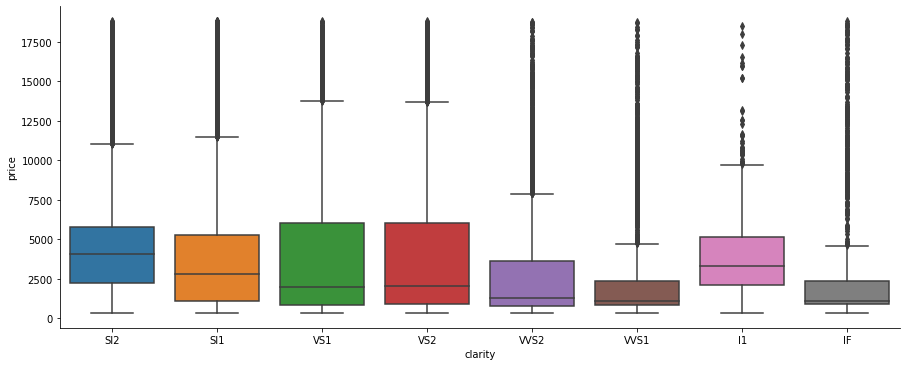

In [ ]:
sns.factorplot(x='clarity', y='price',data=data, kind='box',aspect=2.5)

Boxplots indicate presence of outliers!

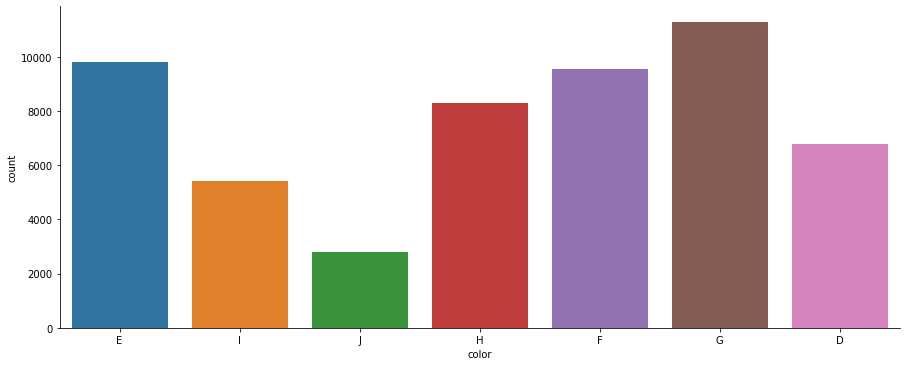

In [ ]:
sns.factorplot(x='color', data=data , kind='count',aspect=2.5 )

The most frequents colors are { G,E,F} 
{D,E,G} means Diamonds are colorless (best) make a significant part of data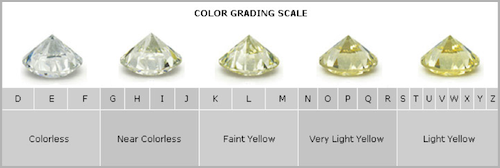

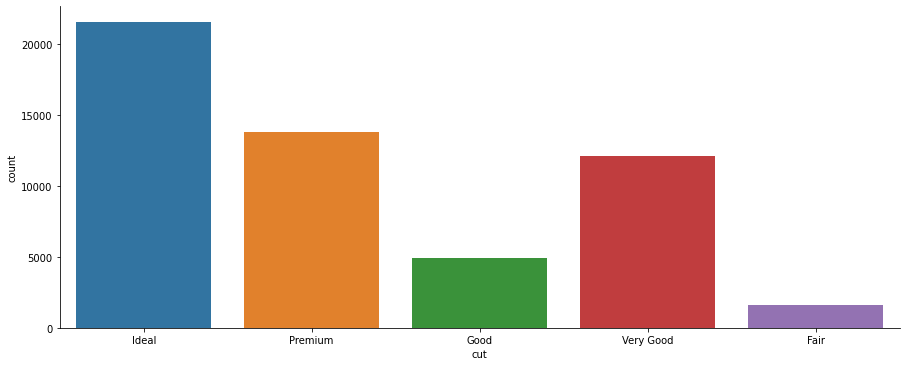

In [ ]:
sns.factorplot(x='cut', data=data , kind='count',aspect=2.5 )

Ideal is the most freguent category, Premium and Very Good are relativley frequent. Fair is the rare category
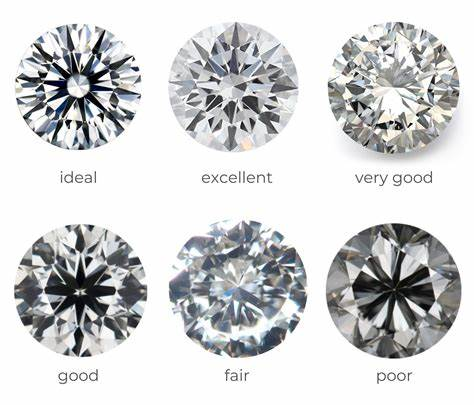

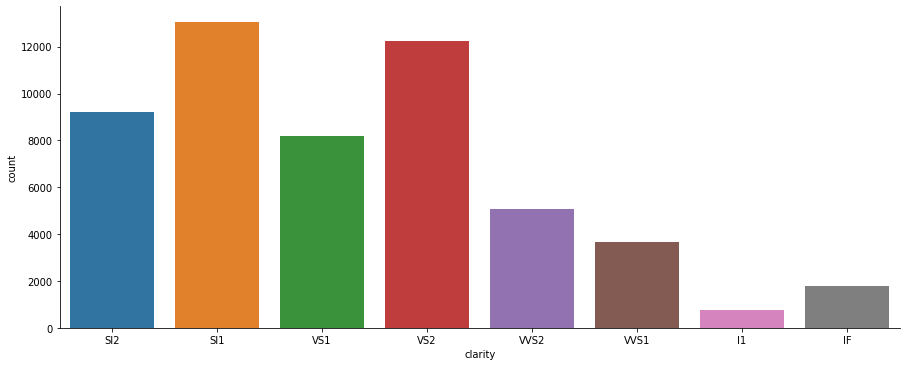

In [ ]:
sns.factorplot(x='clarity', data=data , kind='count',aspect=2.5)

the best clarity is slightly present relatively to the most frequent other types of clarity like : SI1, VS2
the worst type of clarity represent the minority type






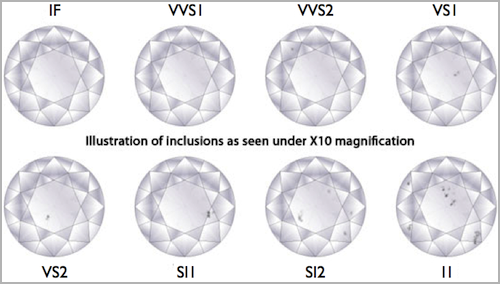

# **Prepare the data for Machine Learning algorithms**

In [ ]:
#Features extraction
data['table_width'] = data['table'] * data['x'] / 100
data['z_depth'] = data['depth'] * data['z'] / 100 

#Features engineering
data['log_price'] = np.log(data['price'])
data['log_carat'] = np.log(data['carat'])



*   Features extraction: 'table_width' based on 'table' and 'z_depth' based on 'depth' using the formulas in the figure below
*   calculation of log price and log carat in order to have more normal distribution as shown so far



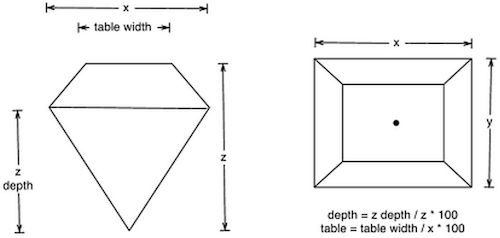

In [ ]:
data.isna().sum() #Clean, No missing values! :)

carat          0
cut            0
color          0
clarity        0
depth          0
table          0
price          0
x              0
y              0
z              0
table_width    0
z_depth        0
log_price      0
log_carat      0
dtype: int64

In [ ]:
len(data[(data['x']==0) | (data['y']==0) | (data['z']==0)])

20

which confirm the results of data visualization
since they are just 20 observation with corrupted data: we chose to drop them

In [ ]:
data = data[(data[['x','y','z']] != 0).all(axis=1)]

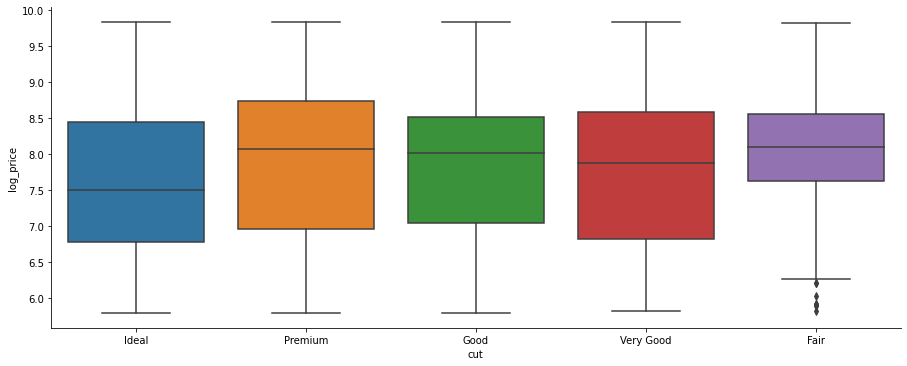

In [ ]:
sns.factorplot(x='cut', y='log_price',data=data, kind='box',aspect=2.5)

the figure : boxplot of "log_price" seems to have less outilers than the boxplot of "price"

In [ ]:
corr_matrix = data.corr()
print(corr_matrix["log_price"].sort_values(ascending=False))

log_price      1.000000
log_carat      0.965921
x              0.960719
z              0.941751
y              0.938453
table_width    0.936447
z_depth        0.923593
carat          0.920253
price          0.895803
table          0.158237
depth          0.000896
Name: log_price, dtype: float64


the added features:'z_depth' and 'table_width' have a significant positive correlation much more remarkable than the correlation of 'table' and 'depth' with the 'log_price'

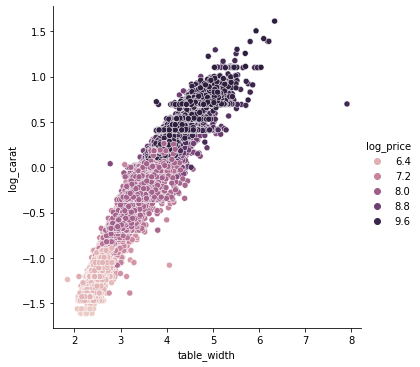

In [ ]:
sns.relplot(data=data, x = "table_width", y="log_carat", hue = "log_price" )

Is a 'table_width' value of 8 reasonable ?!

In [ ]:
data1 = data.copy()

In [ ]:
data.drop(['carat', 'depth', 'table', 'price'], axis=1, inplace=True)

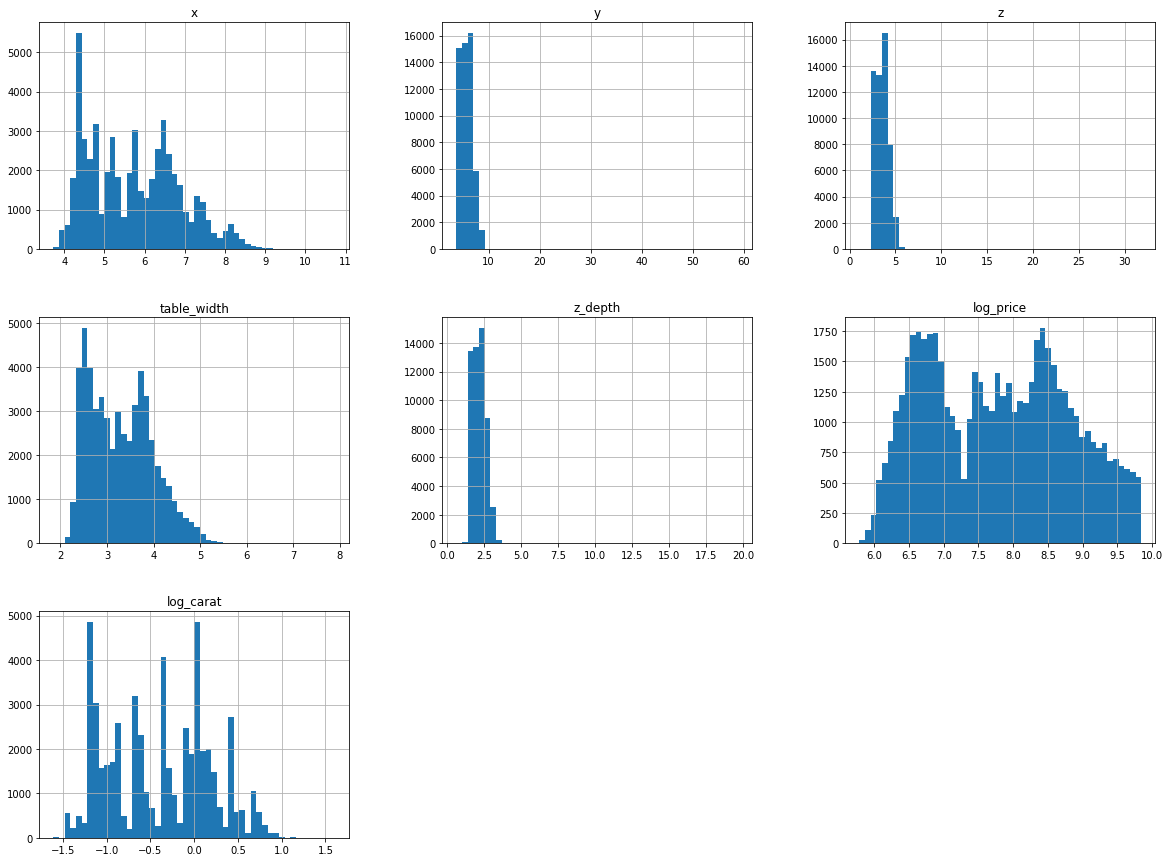

In [ ]:
data.hist(bins=50, figsize=(20,15))
plt.show()

Since we included the transformed and extracted variables, initial ones are dropped


*   Keeping "depth" and "table" will generate multicolinearity between the predictors, which linear regression assume its absence



In [ ]:
scale_mapper1 = {'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal' : 5}
data['cut'] = data['cut'].replace(scale_mapper1)

In [ ]:
scale_mapper = {"I1":1, "SI2":2, "SI1":3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}
data["clarity"] = data["clarity"].replace(scale_mapper)

In [ ]:
scale_mapper3 = {"J":1, "I":2, "H":3, 'G':4, 'F':5, 'E':6, 'D':7}
data['color']=data['color'].replace(scale_mapper3)

Above categorical variable just transformed by paying attention to the grade/scale because they are ordinal.

In [ ]:
data.head(10)

,cut,color,clarity,x,y,z,table_width,z_depth,log_price,log_carat
0,5,6,2,3.95,3.98,2.43,2.1725,1.49445,5.786897,-1.469676
1,4,6,3,3.89,3.84,2.31,2.3729,1.38138,5.786897,-1.560648
2,2,6,5,4.05,4.07,2.31,2.6325,1.31439,5.789960,-1.469676
3,4,2,4,4.20,4.23,2.63,2.4360,1.64112,5.811141,-1.237874
4,2,1,2,4.34,4.35,2.75,2.5172,1.74075,5.814131,-1.171183
5,3,1,6,3.94,3.96,2.48,2.2458,1.55744,5.817111,-1.427116
6,3,2,7,3.95,3.98,2.47,2.2515,1.53881,5.817111,-1.427116
7,3,3,3,4.07,4.11,2.53,2.2385,1.56607,5.820083,-1.347074
8,1,6,4,3.87,3.78,2.49,2.3607,1.62099,5.820083,-1.514128
9,3,3,5,4.00,4.05,2.39,2.4400,1.41966,5.823046,-1.469676


In [ ]:
from sklearn.preprocessing import StandardScaler

num_scaler=StandardScaler()
data = num_scaler.fit_transform(data)
data

array([[ 0.98137411,  0.93697099, -1.24560749, ..., -1.56500669,
        -1.970857  , -1.83751599],
       [ 0.08577307,  0.93697099, -0.63843901, ..., -1.82054979,
        -1.970857  , -1.9930946 ],
       [-1.70542901,  0.93697099,  0.57589795, ..., -1.97195008,
        -1.96783808, -1.83751599],
       ...,
       [-0.80982797,  1.52477175, -0.63843901, ...,  0.11020518,
         0.13356484,  0.06592213],
       [ 0.08577307, -0.8264313 , -1.24560749, ...,  0.21353435,
         0.13356484,  0.41796731],
       [ 0.98137411,  1.52477175, -1.24560749, ...,  0.1743904 ,
         0.13356484,  0.18391273]])

In [ ]:
data = pd.DataFrame(data, columns= ['cut', 'color',	'clarity', 'x',	'y',	'z',	'table_width',	'z_depth',	'log_price',	'log_carat'])

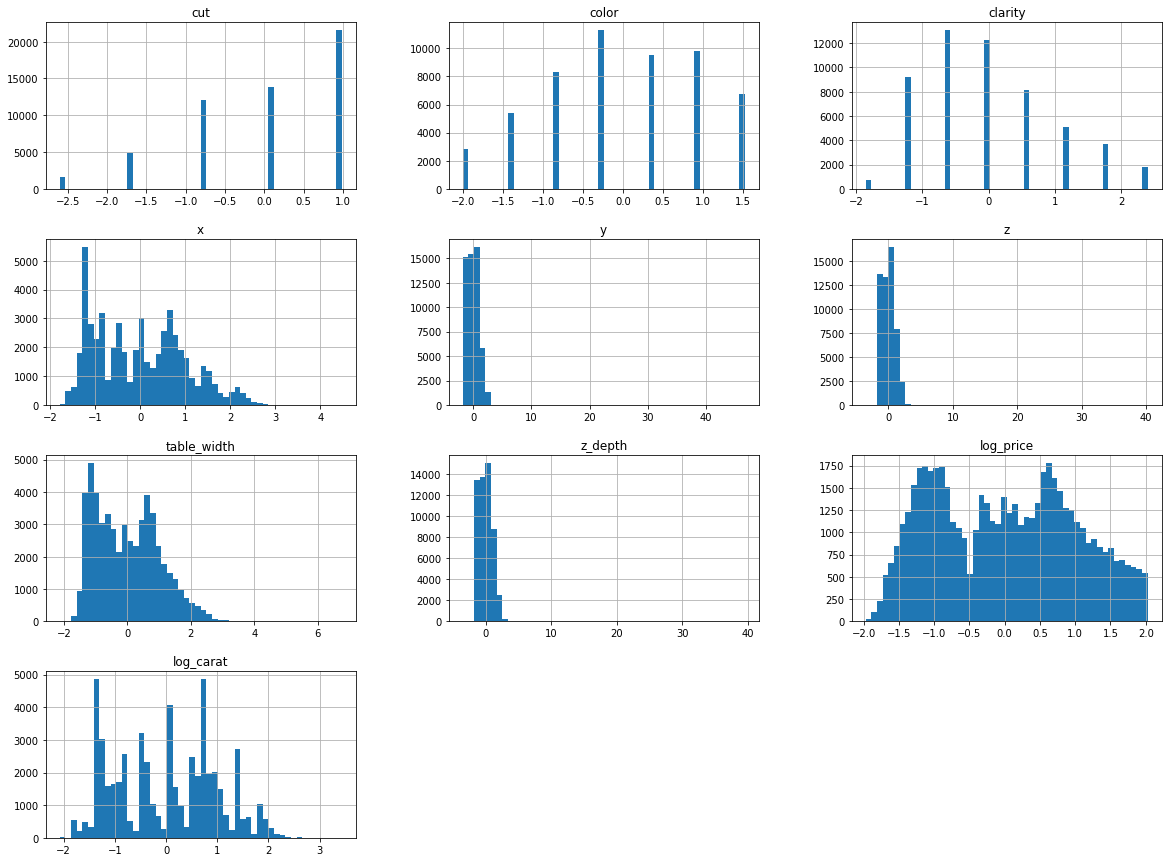

In [ ]:
data.hist(bins=50, figsize=(20,15))
plt.show()

Scaling the data, so there is no difference of measures and range (mean = 0, sd = 1)

# **Select and train a model**

In [ ]:
# Split the data
from sklearn.model_selection import train_test_split
train_set, test_set =train_test_split(data, test_size=0.2,random_state=42)

In [ ]:
train_set.head()

,cut,color,clarity,x,y,z,table_width,z_depth,log_price,log_carat
50157,0.981374,0.936971,0.575898,-0.421316,-0.390212,-0.427098,-0.516790,-0.439166,-0.079968,-0.346510
17679,0.085773,1.524772,-1.245607,1.177737,1.109636,0.982107,1.262797,0.812581,1.070124,1.124594
38186,0.085773,-0.826431,-0.031271,-0.698247,-0.819993,-0.740254,-0.843857,-0.717649,-0.850407,-0.767443
1826,-0.809828,0.349170,0.575898,-0.037186,0.004485,0.014168,0.086472,0.039850,0.236021,0.114100
34526,-0.809828,0.936971,-0.031271,-0.823313,-0.758596,-0.754489,-0.745194,-0.711230,-1.004454,-0.767443


In [ ]:
x_train=train_set.drop('log_price',axis=1)
y_train=train_set['log_price'].copy()
x_test=test_set.drop('log_price',axis=1)
y_test=test_set['log_price'].copy()

**1. RandomForestRegressor Algorithm**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf=RandomForestRegressor(random_state=0)
rf.fit(x_train,y_train)
print('Accuracy =', rf.score(x_train,y_train), '\nRMSE =', np.sqrt(mean_squared_error(y_train,rf.predict(x_train))))

Accuracy = 0.998889836210079 
RMSE = 0.03332125311937884


In [ ]:
prd_rf=rf.predict(x_test)
mse_rf= mean_squared_error(y_test,prd_rf)
rmse_rf=np.sqrt(mse_rf)
print('RMSE =',rmse_rf)

RMSE = 0.08801692360995589


In [ ]:
print('Accuracy =', rf.score(x_test,y_test))

Accuracy = 0.9922488134859284


**2. KNeighborsRegressor Algorithm**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
print('Accuracy =', knr.score(x_train,y_train), '\nRMSE =', np.sqrt(mean_squared_error(y_train,knr.predict(x_train))))

Accuracy = 0.9921308320186579 
RMSE = 0.08871400885091332


In [ ]:
prd_knr=knr.predict(x_test)
mse_knr=mean_squared_error(y_test,prd_knr)
rmse_knr=np.sqrt(mse_knr)
print('RMSE =', rmse_knr)

RMSE = 0.1099215691834573


In [ ]:
print('Accuracy =', knr.score(x_test,y_test))

Accuracy = 0.9879106860366321


**3. Ridge Algorithm**

In [ ]:
from sklearn.linear_model import Ridge
rg=Ridge(random_state=0)
rg.fit(x_train,y_train)
print('Accuracy =', rg.score(x_train,y_train), '\nRMSE =', np.sqrt(mean_squared_error(y_train,rg.predict(x_train))))

Accuracy = 0.9791216857483631 
RMSE = 0.14450255023667719


In [ ]:
prd_rg=rg.predict(x_test)
mse_rg=mean_squared_error(y_test, prd_rg)
rmse_rg=np.sqrt(mse_rg)
print('RMSE =', rmse_rg)

RMSE = 0.1416958394011688


In [ ]:
print('Accuracy =', rg.score(x_test,y_test))

Accuracy = 0.9799113841449383


**4. BayesianRidge Algorithm**

In [ ]:
# Bayesian regression
from sklearn.linear_model import BayesianRidge
br=BayesianRidge()
br.fit(x_train,y_train)
print('Accuracy =', br.score(x_train,y_train), '\nRMSE =', np.sqrt(mean_squared_error(y_train,br.predict(x_train))))

Accuracy = 0.9791217535702167 
RMSE = 0.14450231553289214


In [ ]:
prd_br=br.predict(x_test)
mse_br=mean_squared_error(y_test,prd_br)
rmse_br=np.sqrt(mse_br)
print('RMSE =', rmse_br)

RMSE = 0.14173526680950327


In [ ]:
print('Accuracy =', br.score(x_test,y_test))

Accuracy = 0.979900203121446


**5. SGDRegressor Algorithm**

In [ ]:
from sklearn.linear_model import SGDRegressor
sgr = SGDRegressor(random_state=42)
sgr.fit(x_train,y_train)
print('Accuracy =', sgr.score(x_train,y_train), '\nRMSE =', np.sqrt(mean_squared_error(y_train,sgr.predict(x_train))))

Accuracy = 0.9787073989778843 
RMSE = 0.14592918430188973


In [ ]:
prd_sgr=sgr.predict(x_test)
mse_sgr=mean_squared_error(y_test,prd_sgr)
rmse_sgr=np.sqrt(mse_sgr)
print('RMSE =', rmse_sgr)

RMSE = 0.1436068008269803


In [ ]:
print('Accuracy =', sgr.score(x_test,y_test))

Accuracy = 0.9793658856851137


**6. Lasso Algorithm**

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(random_state=42, alpha=0.005)
lasso.fit(x_train,y_train)
print('Accuracy =', lasso.score(x_train,y_train), '\nRMSE =', np.sqrt(mean_squared_error(y_train,lasso.predict(x_train))))

Accuracy = 0.9789165818950911 
RMSE = 0.14521059580794243


In [ ]:
prd_lasso=lasso.predict(x_test)
mse_lasso=mean_squared_error(y_test,prd_lasso)
rmse_lasso=np.sqrt(mse_lasso)
print('RMSE =', rmse_lasso)

RMSE = 0.142012576765078


In [ ]:
print('Accuracy =', lasso.score(x_test,y_test))

Accuracy = 0.9798214742822018


**7. LinearRegression Algorithm**

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
print('Accuracy =', reg.score(x_train,y_train), '\nRMSE =', np.sqrt(mean_squared_error(y_train,reg.predict(x_train))))

Accuracy = 0.9791217553784115 
RMSE = 0.14450230927546184


In [ ]:
prd_reg=reg.predict(x_test)
mse_reg=mean_squared_error(y_test,prd_reg)
rmse_reg=np.sqrt(mse_reg)
print('RMSE =', rmse_reg)

RMSE = 0.1417435655715111


In [ ]:
print('Accuracy =', reg.score(x_test,y_test))

Accuracy = 0.9798978493203389


**8. Support Vector Machines Algorithm**

In [ ]:
from sklearn.svm import SVR
svm_reg=SVR()
svm_reg.fit(x_train,y_train)
print('Accuracy =', svm_reg.score(x_train,y_train), '\nRMSE =', np.sqrt(mean_squared_error(y_train,reg.predict(x_train))))

Accuracy = 0.9904317100150718 
RMSE = 0.14450230927546184


In [ ]:
prd_reg=svm_reg.predict(x_test)
mse_reg=mean_squared_error(y_test,prd_reg)
rmse_reg=np.sqrt(mse_reg)
print('RMSE =', rmse_reg)

RMSE = 0.09763230810577556


In [ ]:
print('Accuracy =', svm_reg.score(x_test,y_test))

Accuracy = 0.9904627551935458


**9. DecisionTreeRegressor Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)
housing_predictions = tree_reg.predict(x_test)
print('Accuracy =', tree_reg.score(x_train,y_train), '\nRMSE =', np.sqrt(mean_squared_error(y_train,tree_reg.predict(x_train))))

Accuracy = 0.9999847914512566 
RMSE = 0.0039000635497075794


In [ ]:
prd_reg=tree_reg.predict(x_test)
mse_reg=mean_squared_error(y_test,prd_reg)
rmse_reg=np.sqrt(mse_reg)
print('RMSE =', rmse_reg)

RMSE = 0.12177561185742887


In [ ]:
print('Accuracy =', tree_reg.score(x_test,y_test))

Accuracy = 0.9851626460126272


# **Fine-tune our chosen model**

1.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42) 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(x_train, y_train)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.1274522266349982 {'max_features': 2, 'n_estimators': 3}
0.10896335387731836 {'max_features': 2, 'n_estimators': 10}
0.10230543485683168 {'max_features': 2, 'n_estimators': 30}
0.11047831643036722 {'max_features': 4, 'n_estimators': 3}
0.09658749444860763 {'max_features': 4, 'n_estimators': 10}
0.09237811947227086 {'max_features': 4, 'n_estimators': 30}
0.1067016785147475 {'max_features': 6, 'n_estimators': 3}
0.09454191389996337 {'max_features': 6, 'n_estimators': 10}
0.0909251914263584 {'max_features': 6, 'n_estimators': 30}
0.10528597811862468 {'max_features': 8, 'n_estimators': 3}
0.09477968947502519 {'max_features': 8, 'n_estimators': 10}
0.09115629593978297 {'max_features': 8, 'n_estimators': 30}
0.12351557886154321 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.10588874960820581 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.11263975762857599 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.09868140801879813 {'bootstrap': False, 'max_fea

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

2.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(x_train, y_train)

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.08965407059641545 {'max_features': 7, 'n_estimators': 180}
0.0933642970640641 {'max_features': 5, 'n_estimators': 15}
0.09341026718600437 {'max_features': 3, 'n_estimators': 72}
0.09230963194726838 {'max_features': 5, 'n_estimators': 21}
0.08968826411775985 {'max_features': 7, 'n_estimators': 122}
0.0933892821104235 {'max_features': 3, 'n_estimators': 75}
0.09326154519179528 {'max_features': 3, 'n_estimators': 88}
0.0901306212138455 {'max_features': 5, 'n_estimators': 100}
0.09299439556328062 {'max_features': 3, 'n_estimators': 150}
0.11489506564219475 {'max_features': 5, 'n_estimators': 2}


In [ ]:
rnd_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=7, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=180, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

We conclude that we have to increase the "n_estimators", which is clear from the results of grid search and the randomized search, the best estimators have 30 and 122 "n_estimators" respectively

3.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [120, 130, 150, 190, 200], 'max_features': [2, 4, 6, 7, 8]},
  ]

forest_reg = RandomForestRegressor(random_state=42) 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(x_train, y_train)

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
final_model = grid_search.best_estimator_
final_predictions=final_model.predict(x_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.08560204536483083

4.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [200, 250, 300], 'max_features': [6]},
  ]

forest_reg = RandomForestRegressor(random_state=42) 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error',return_train_score=True,random_state=42)
grid_search.fit(x_train, y_train)

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
final_model = grid_search.best_estimator_
final_predictions=final_model.predict(x_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.08566351865611924

5.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=200, high=300),
        'max_features': randint(low=6, high=7),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(x_train, y_train)

In [ ]:
rnd_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=292, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
final_model = rnd_search.best_estimator_
final_predictions=final_model.predict(x_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.08568496239571724

# ****The Result below is the best :)**

# RMSE = 0.08560204536483083

# Estimator: 

**RandomForestRegressor**(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, **max_features=6**, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      **n_estimators=200**, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

---




# **Done :)**